# Scenario Builder
*Use this notebook to generate new scenarios for the simulation.*

In [1]:
%%capture
%matplotlib inline

import GWorld
import Agent
import PlotGWorld
plotgw = PlotGWorld.PlotGWorld(); # Object for accessing plotters
import pprint
import json
import numpy as np
rng = np.random.default_rng(seed=0)

## Preview Existing Scenarios


------------------------------------------------------------------------------------------------------------
DoubleLane-2Agents-5Cases
------------------------------------------------------------------------------------------------------------


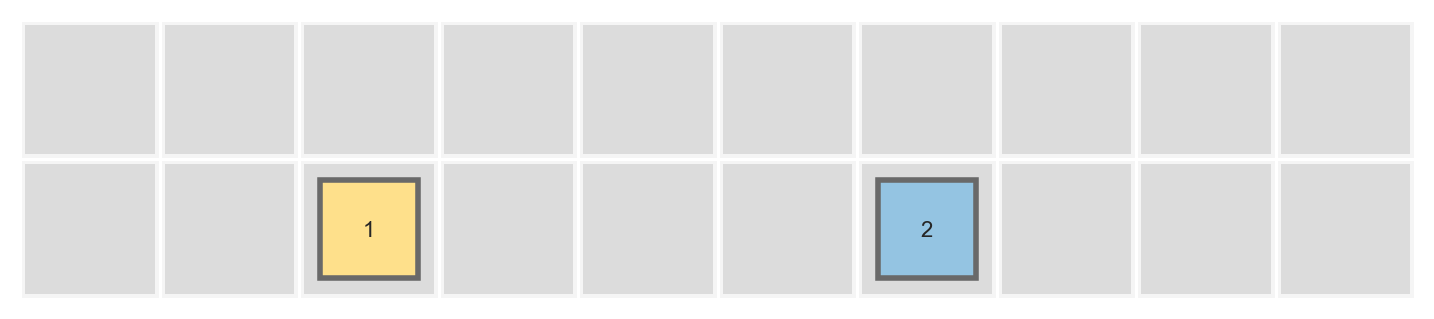

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
DoubleLane-2Agents-5Cases-5Iterations
------------------------------------------------------------------------------------------------------------


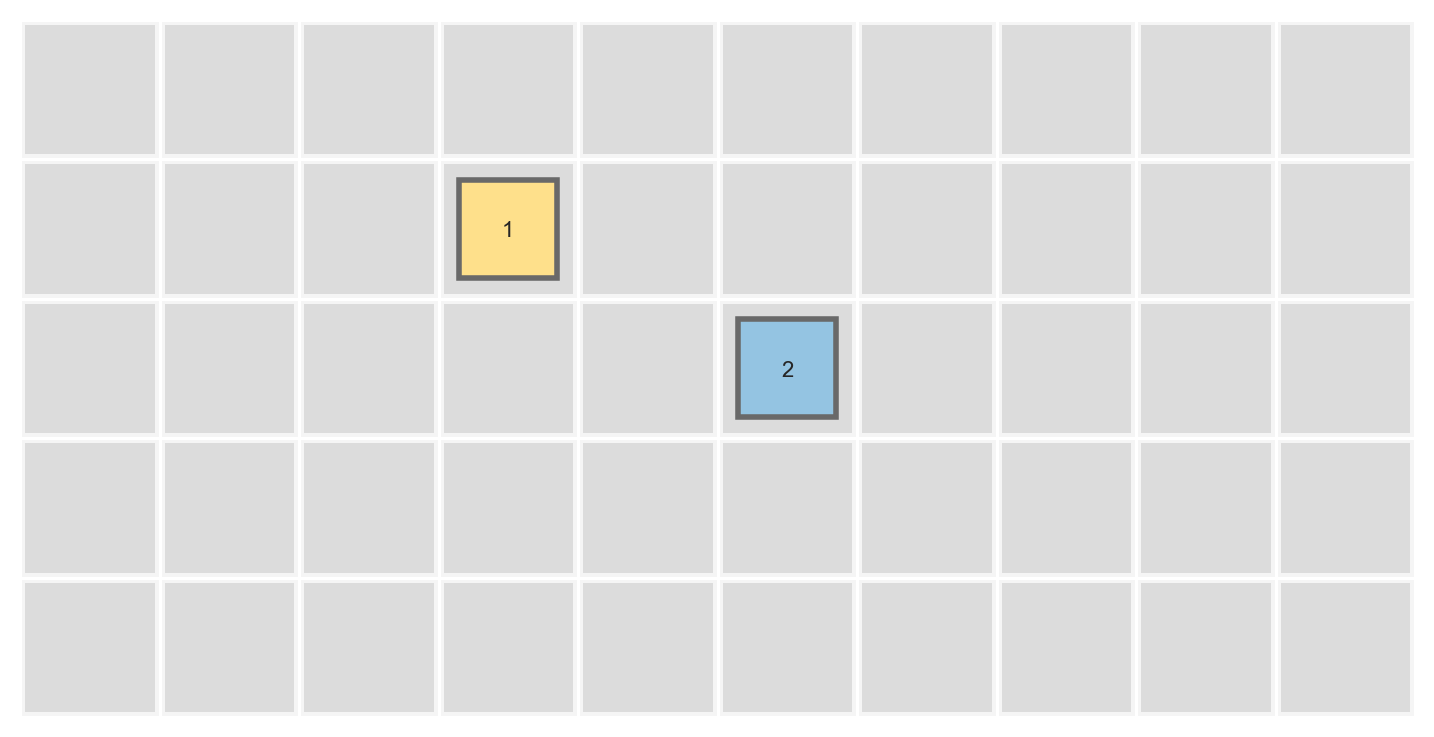

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
GameMap
------------------------------------------------------------------------------------------------------------


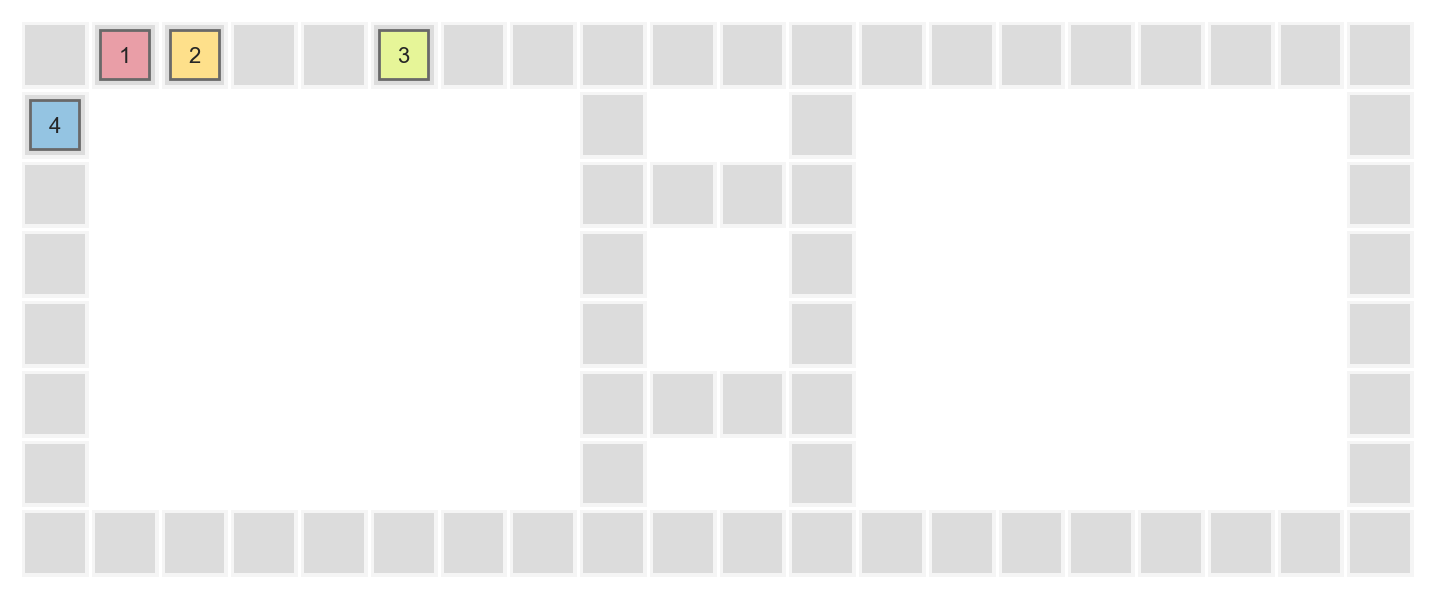

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection-3Agents
------------------------------------------------------------------------------------------------------------


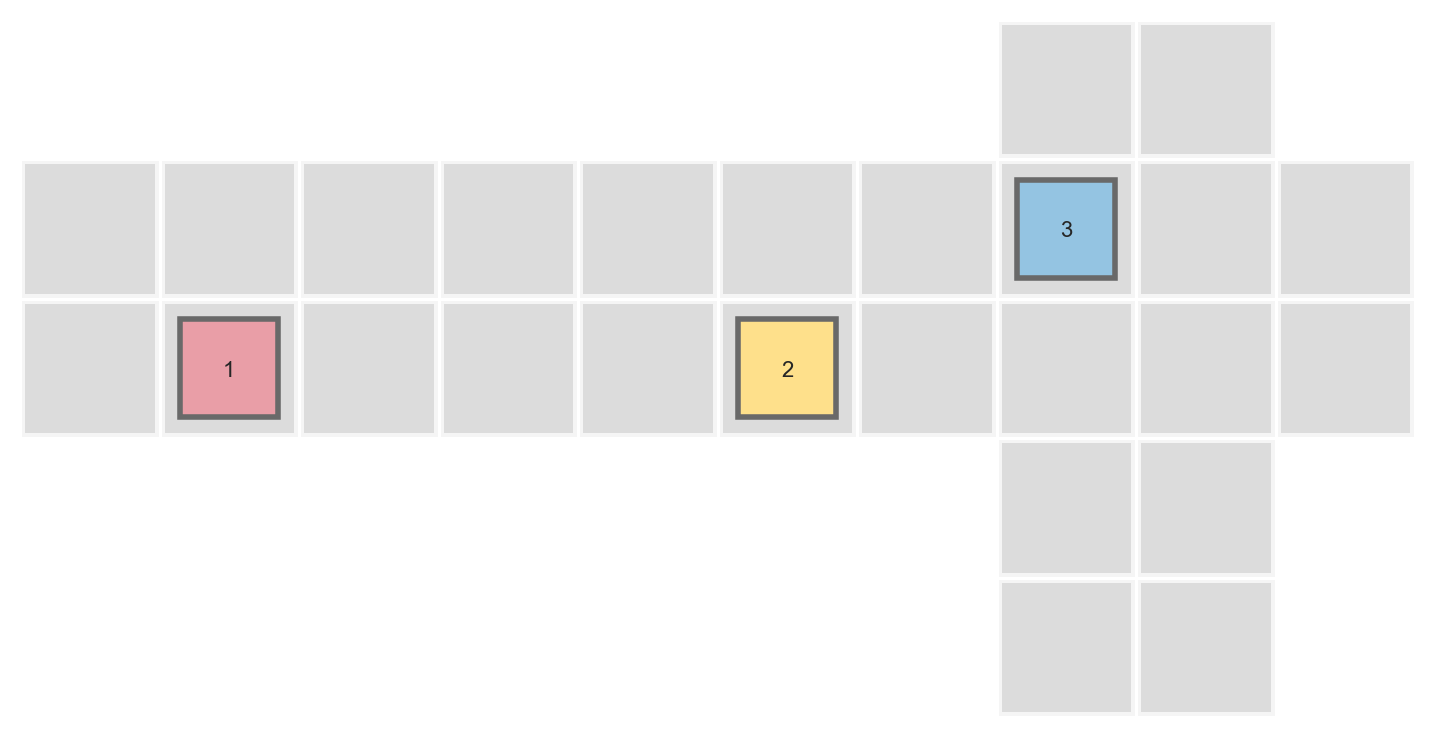

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection-3Agents-100Cases-1Iteration
------------------------------------------------------------------------------------------------------------


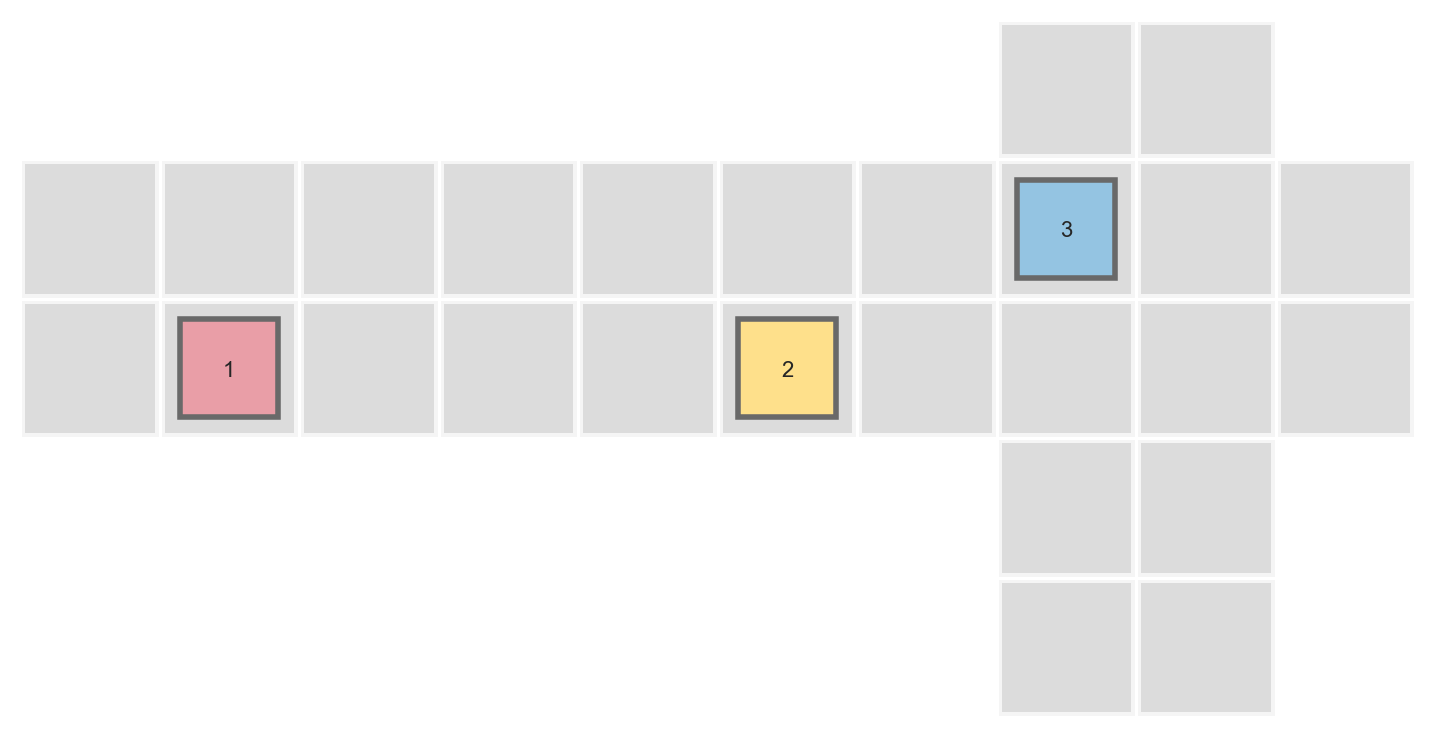

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection-3Agents-100Cases-3Iterations
------------------------------------------------------------------------------------------------------------


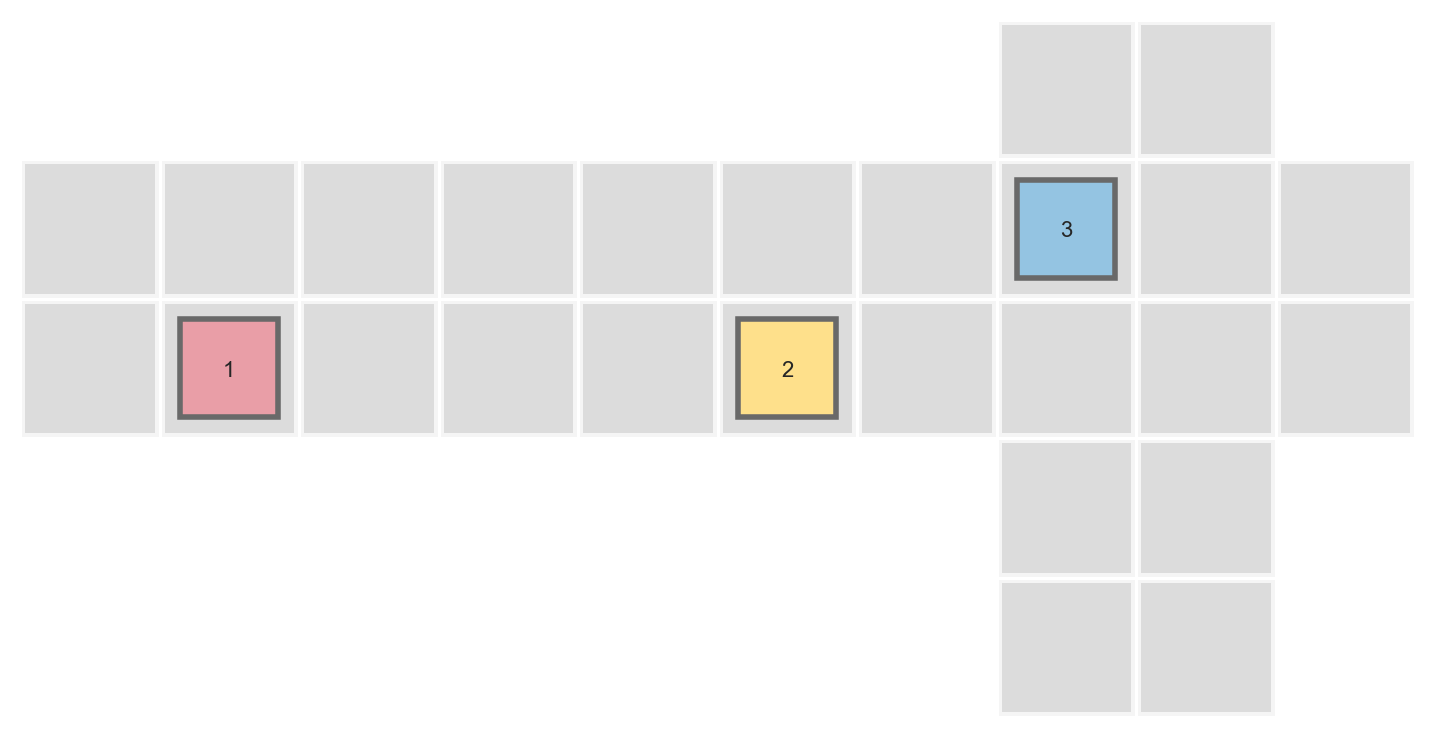

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Intersection-3Agents-Tight
------------------------------------------------------------------------------------------------------------


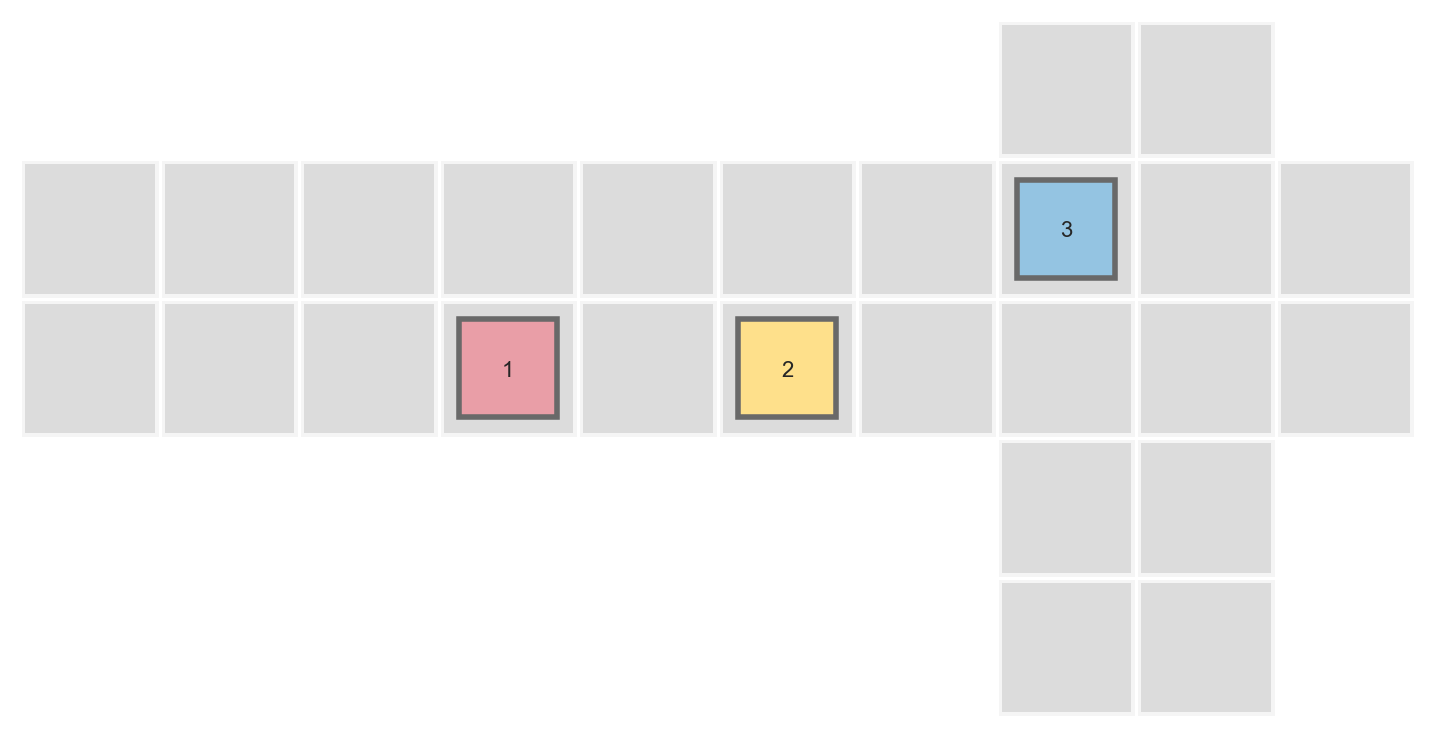

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Map-2Agents-50Cases-10Iterations
------------------------------------------------------------------------------------------------------------


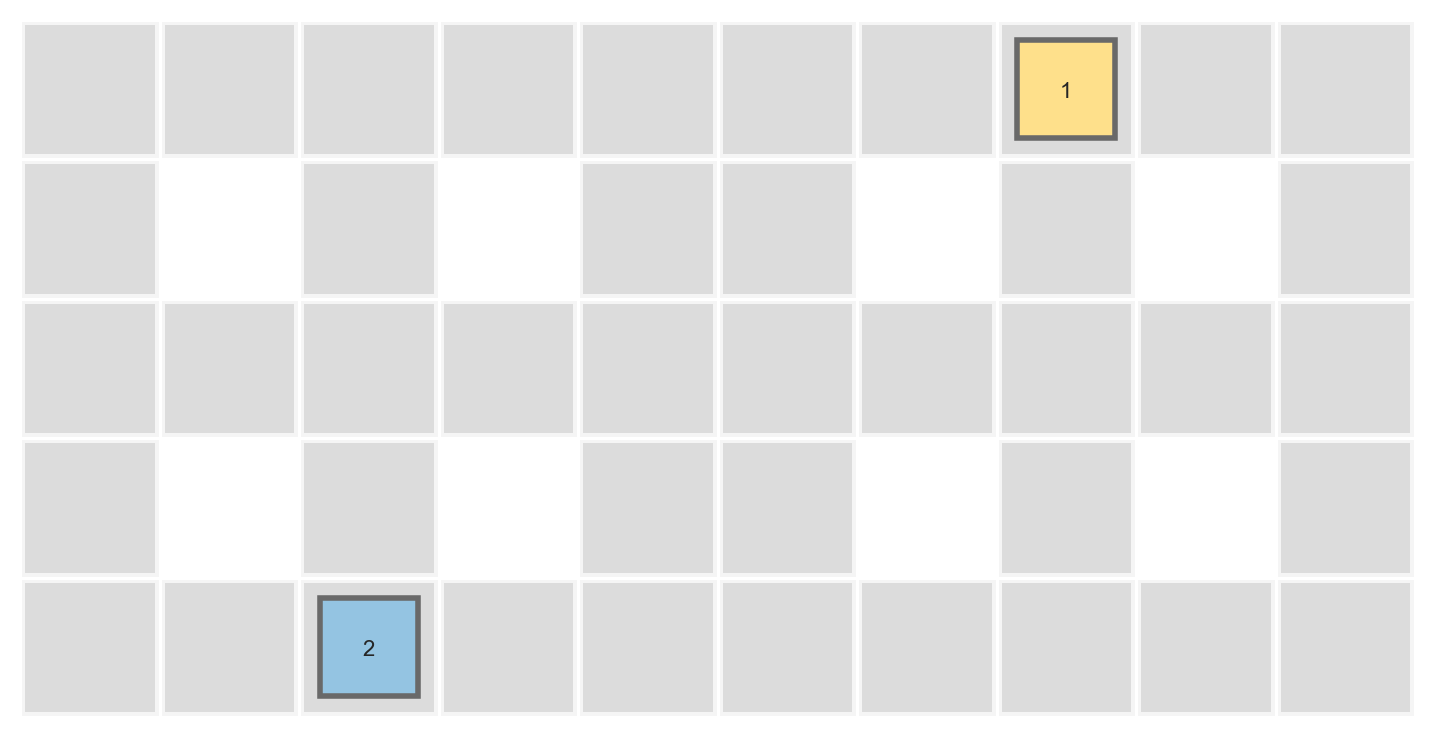

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
Map-5Agents-50Cases-10Iterations
------------------------------------------------------------------------------------------------------------


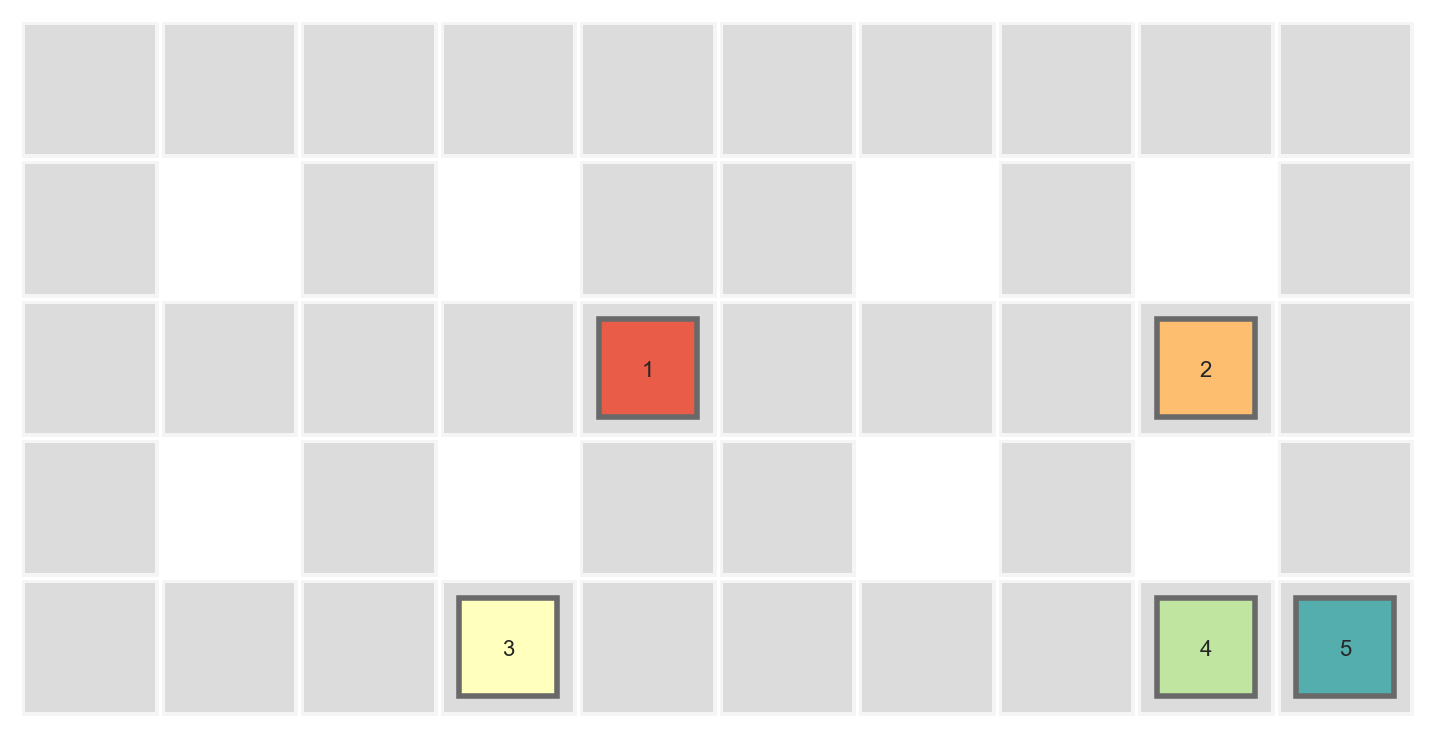

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane
------------------------------------------------------------------------------------------------------------


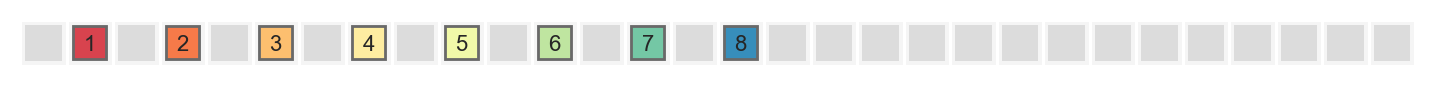

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents
------------------------------------------------------------------------------------------------------------


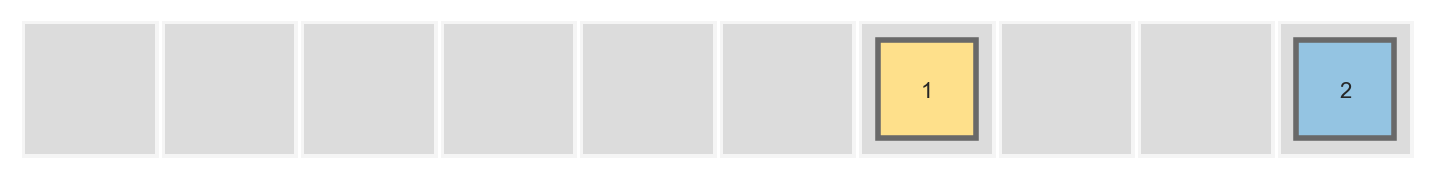

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-5Cases
------------------------------------------------------------------------------------------------------------


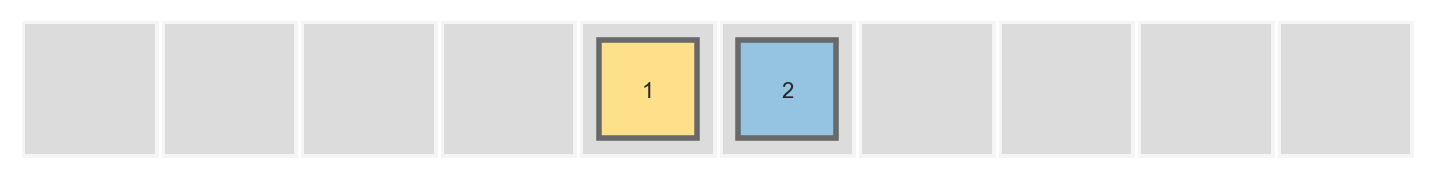

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-Length10
------------------------------------------------------------------------------------------------------------


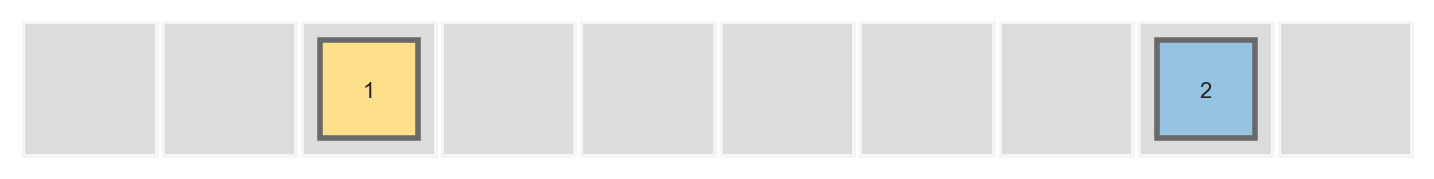

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-Length10-AgentsAt-3-5
------------------------------------------------------------------------------------------------------------


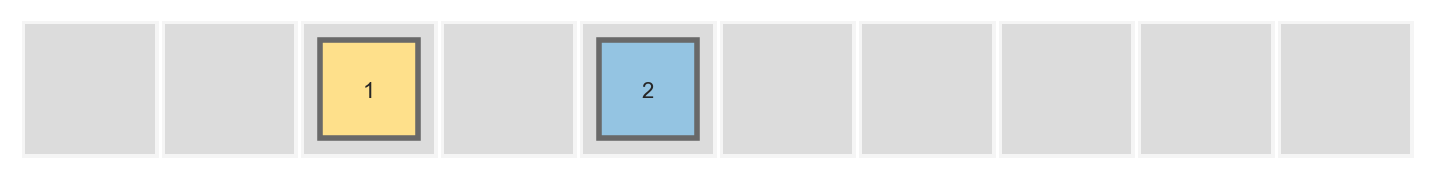

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-Length10-AgentsAt-3-5-100Cases
------------------------------------------------------------------------------------------------------------


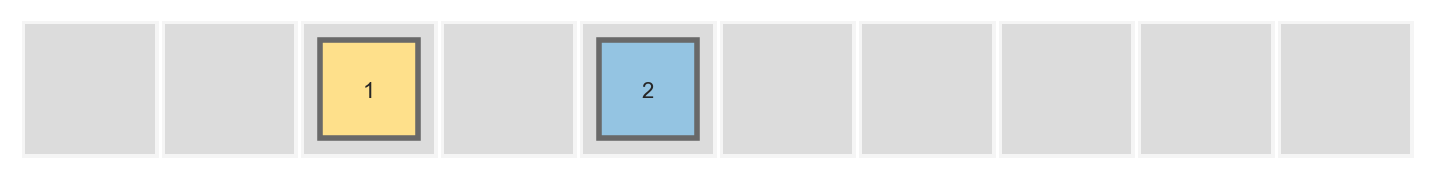

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-Length10-AgentsAt-3-8
------------------------------------------------------------------------------------------------------------


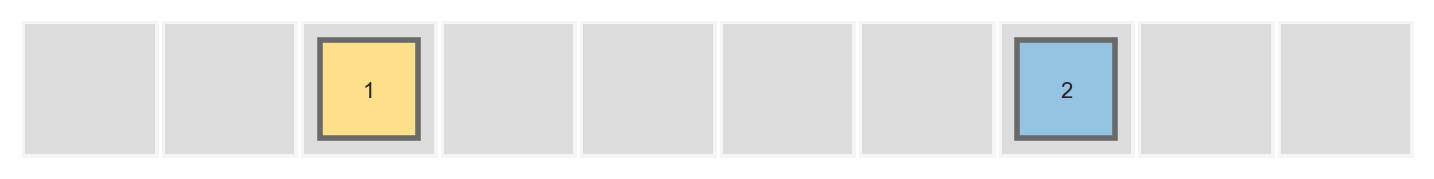

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-Length10-AgentsAt-3-8-100Cases
------------------------------------------------------------------------------------------------------------


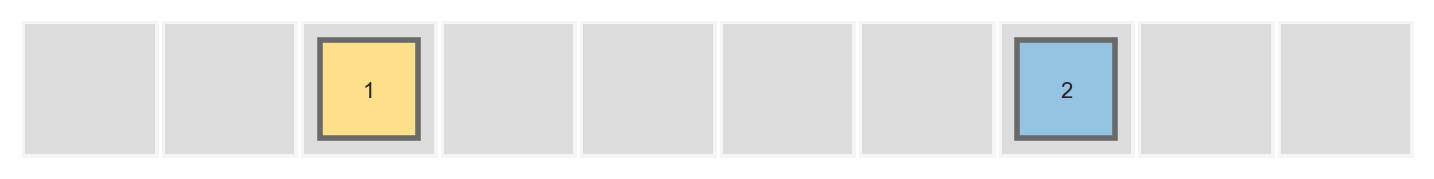

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-2Agents-Length5
------------------------------------------------------------------------------------------------------------


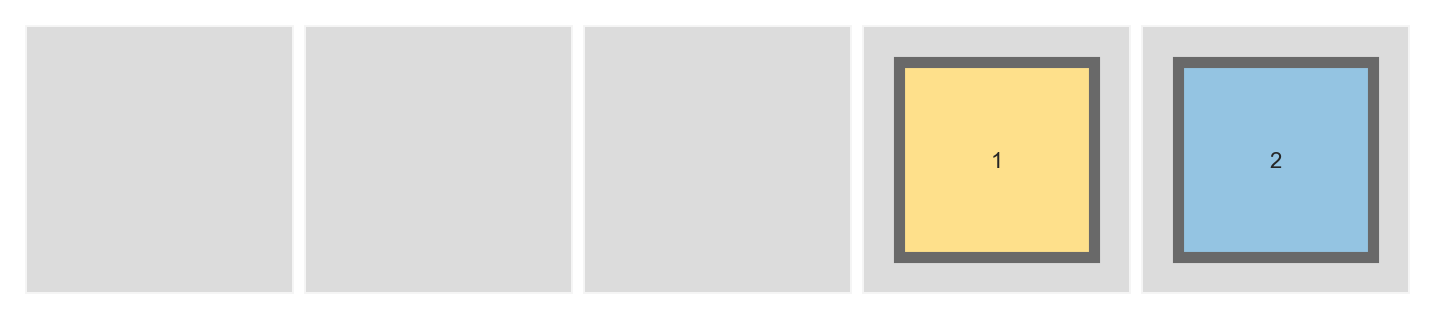

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-3Agents-50Cases-10Iterations
------------------------------------------------------------------------------------------------------------


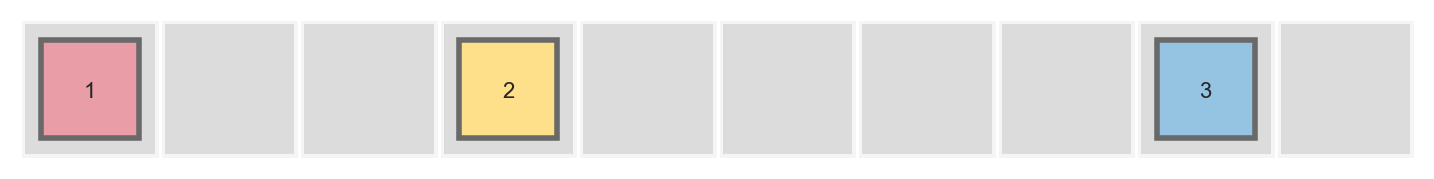

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-3Agents-Aisle-Highway
------------------------------------------------------------------------------------------------------------


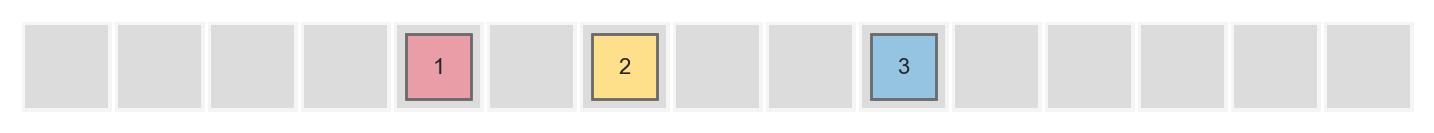

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-3Agents-Aisle-Highway-Bidirectional
------------------------------------------------------------------------------------------------------------


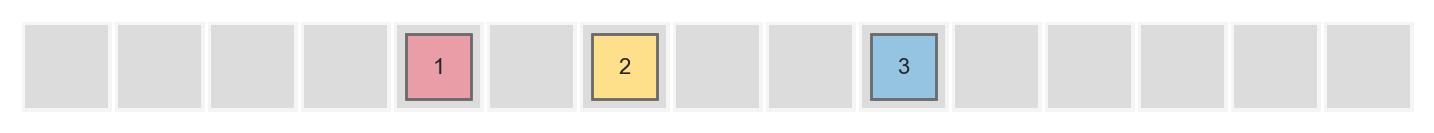

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-4Agents-50Cases-10Iterations
------------------------------------------------------------------------------------------------------------


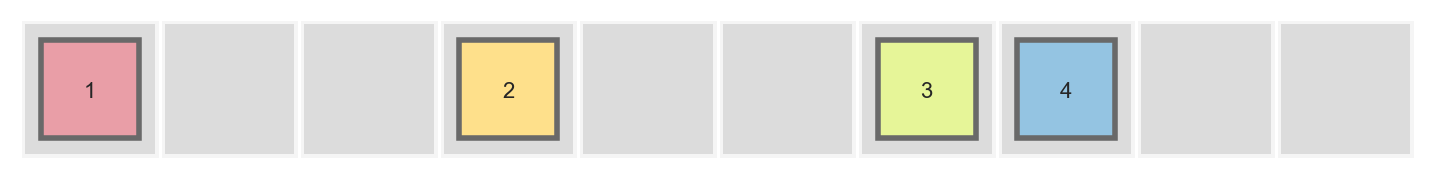

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-8Agents
------------------------------------------------------------------------------------------------------------


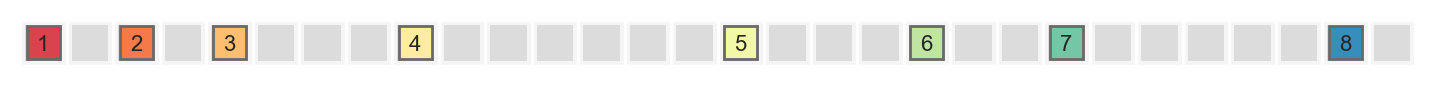

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-8Agents-5iterations
------------------------------------------------------------------------------------------------------------


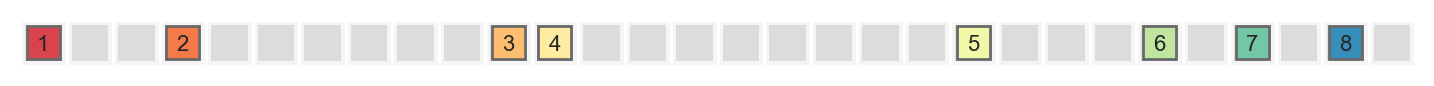

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-8Agents-5iterations-5cases
------------------------------------------------------------------------------------------------------------


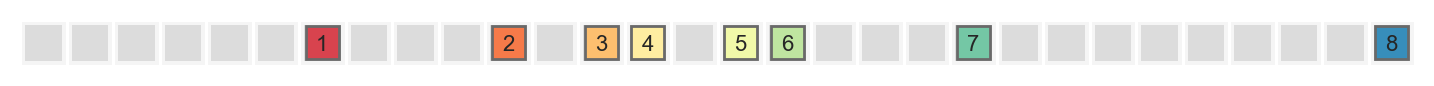

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane-8Agents-Bidirectional
------------------------------------------------------------------------------------------------------------


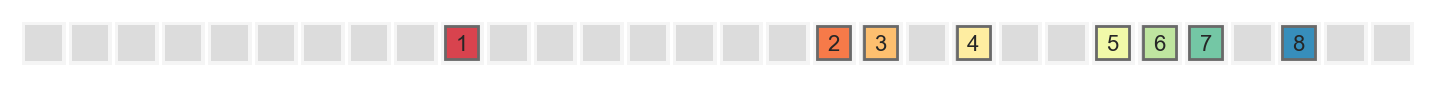

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane10-2Agents-AgentsAt-3-5
------------------------------------------------------------------------------------------------------------


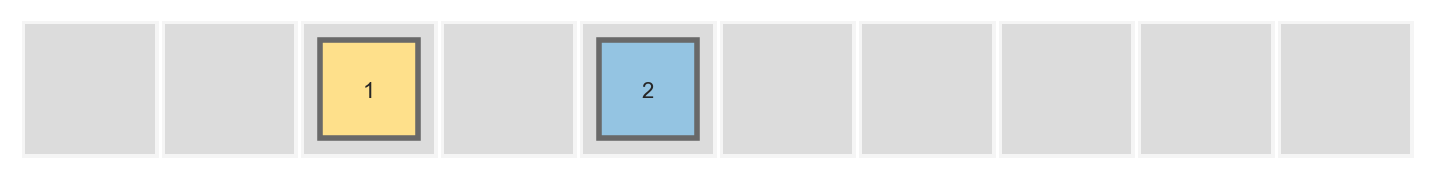

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane10-2Agents-AgentsAt-3-8
------------------------------------------------------------------------------------------------------------


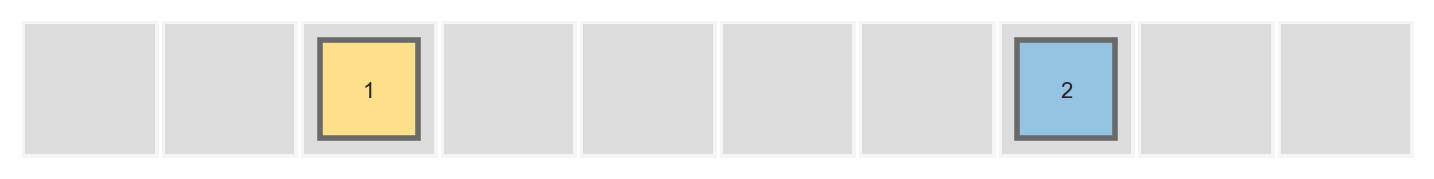

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane10-4Agents
------------------------------------------------------------------------------------------------------------


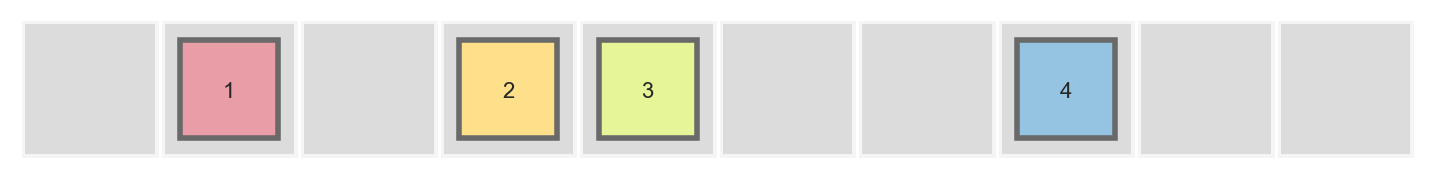

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane10-4Agents-2Way
------------------------------------------------------------------------------------------------------------


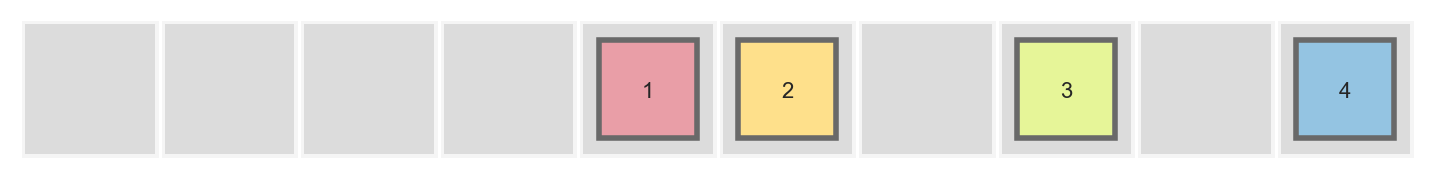

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane20-8Agents
------------------------------------------------------------------------------------------------------------


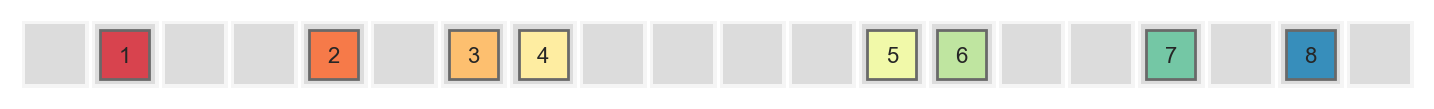

------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------
SingleLane20-8Agents-2Way
------------------------------------------------------------------------------------------------------------


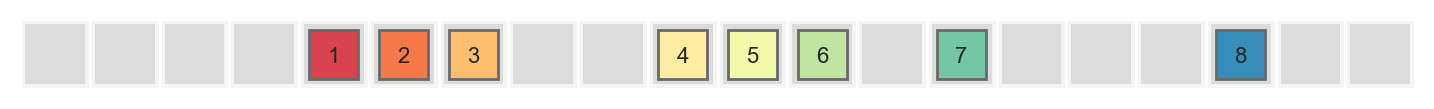

------------------------------------------------------------------------------------------------------------






In [2]:
Scenario_source_file = 'Scenarios4FeARSims.json'


with open(Scenario_source_file) as f:
    data = json.load(f)
    
scenarios_ = data.keys()

for scenario_ in scenarios_:
    print('------------------------------------------------------------------------------------------------------------')
    print(f'{scenario_}')
    print('------------------------------------------------------------------------------------------------------------')
    
    Scenario = GWorld.LoadJsonScenario(json_filename=Scenario_source_file,scenario_name=scenario_)
    
    # GWorld Preview

    Region = np.array(Scenario['Map']['Region'])
    Walls = Scenario['Map']['Walls']
    OneWays = Scenario['Map']['OneWays']

    World = GWorld.GWorld(Region, Walls= Walls, OneWays = OneWays) # Initialising GWorld from Scenario

    N_Agents = Scenario['N_Agents']
    AgentLocations = Scenario['AgentLocations'].copy()


    AgentLocations = []
    for location in Scenario['AgentLocations']:
        AgentLocations.append(tuple(location))

    # Adding N Agents at sorted random positions
    if len(AgentLocations) < N_Agents:
        [locX,locY] = np.where(Region==1)

        LocIdxs = rng.choice(locX.shape[0], size=(N_Agents-len(AgentLocations)), replace=False, shuffle=False)
        LocIdxs.sort()

        for Idx in LocIdxs:
            AgentLocations.append((locX[Idx],locY[Idx]))

    # Adding Agents
    PreviousAgentAdded = True
    for location in AgentLocations:
        # Adding new Agents if Previous Agent was Added to the World
        if PreviousAgentAdded: 
            Ag_i = Agent.Agent()
        PreviousAgentAdded = World.AddAgent(Ag_i,location, printStatus=False)

    PreviousAgentAdded = True
    while len(World.AgentList) < N_Agents:
        # Adding new Agents if Previous Agent was Added to the World
        if PreviousAgentAdded: 
            Ag_i = Agent.Agent()
        Loc_i = (np.random.randint(Region.shape[0]),np.random.randint(Region.shape[1]))
        PreviousAgentAdded = World.AddAgent(Ag_i,Loc_i, printStatus=False)


    # Plotting the State of the World and Chosen Actions for the next iteration
    plotgw.ViewGWorld(World,ViewActionArrows=False ,ViewActionTrail=False);
    
    print('------------------------------------------------------------------------------------------------------------\n\n\n\n')


The Scenario Buiilder creates new scenarios using already existing scenarios as a template.

## Inputs
- `Scenario_source_file` : Name of the JSON file which has the **template scenario**
- `Scenario_destination_file` : Name of the JSON file to which the **new scenario** is to be saved. 
- `Template_Scenario` : Name of the **template scenario** in `Scenario_source_file` which is to be used as the template for the **new scenario**
- `new_scenario_name` : Name of the **new scenario**

In [3]:
# For creating a New Scenarion based on Some Scenario
Template_Scenario = 'SingleLane-3Agents-Aisle-Highway'
new_scenario_name = 'SingleLane-3Agents-Aisle-Highway-Bidirectional'

Scenario_source_file = 'Scenarios4FeARSims.json'
Scenario_destination_file = 'Scenarios4FeARSims.json'

Scenario = GWorld.LoadJsonScenario(json_filename=Scenario_source_file,scenario_name=Template_Scenario)

# Converting back to JSON format
Scenario= json.loads(json.dumps(Scenario,indent=1, sort_keys=True))

# View Template Scenario

In [4]:
# View  Template Scenario
pretty_print_json = pprint.pformat(Scenario,width=150).replace("'", '"')
print(pretty_print_json)

{"AgentLocations": [[0, 4], [0, 6], [0, 9]],
 "DirectionWeights": [0, 0, 0, 1],
 "Map": {"OneWays": [], "Region": [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], "Walls": []},
 "N_Agents": 3,
 "N_Cases": 125,
 "N_iterations": 1,
 "SpecificAction4Agents": [],
 "SpecificDirectionWeights4Agents": [],
 "SpecificStepWeights4Agents": [],
 "StepWeights": [1, 1, 1, 1, 1],
 "defaultAction": "random"}


---


# Generate New Map
The following commands can be useful in defining a NewMap for the scenario

- The Map of the GWorld Scenario is represented by a Matrix of ones and zeros. 
- **Ones** represent **valid locations** the agents in the simulation can occupy.
- **Zeros** represent **invalid locations which cannot be occupied by agents.

In [5]:
# # NewMap = np.ones([5,10])
# NewMap = np.zeros([10,16])
# NewMap = np.ones([10,20])
NewMap = np.ones([1,15])


# marginx = 4
# marginy = 1

# NewMap[0,:] = 1
# NewMap[-1,:] = 1
# NewMap[:,0] = 1
# NewMap[:,-1] = 1


# NewMap[:,marginx+1] = 1
# NewMap[:,-(marginx+2)] = 1

# NewMap[marginy+1,marginx+1:-(marginx+2)] = 1
# NewMap[-(marginy+2),marginx+1:-(marginx+2)] = 1


# # NewMap[:,9] = 1
# # NewMap[:,4] = 1
# # NewMap[:,5] = 1
# # NewMap[:,2] = 1
# NewMap[:,7] = 1
# NewMap[:,8] = 1


print(NewMap)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


# Make changes to the values of the Template

- `Overwrite = False` ensures that already existing scenarios are not overwritten.

---

- Use **DirectionWeights** and **StepWeights** to select the relative preference for action selection. These together define the action selection policy of an agent.
- **DirectionWeights** and **StepWeights** are the default values for all agents.
- To specify different values for specific agents use **SpecificDirectionWeights4Agents** and **SpecificStepWeights4Agents**

---

- **OneWays** allow for movement in one direction only (from start to stop).
- Actions that cause movements from the stop to start of a OneWay results is invalid and trigger collisions
- Define OneWays as list of tuples of adjacent locations [ [[x_start,y_start], [x_stop,y_stop]], [[x_start,y_start], [x_stop,y_stop]], ... ]

---

- **Walls** are also defined between adjacent cells. But movement is blocked in both directions.
- Define Walls as list of tuples of adjacent locations [ [[x_start,y_start], [x_stop,y_stop]], [[x_start,y_start], [x_stop,y_stop]], ... ]

---

In [6]:
# Making Changes

# Overwrite = False
Overwrite = True


# Scenario['Map']['OneWays'] = [ [[2,5],[2,6]], [[7,10],[7,9]], [[2,10],[3,10]], [[7,5],[6,5]]  ]
# Scenario['Map']['Walls'] = [ [[1,5],[2,5]], [[7,10],[8,10]] ]
# Scenario['Map']['Region'] = NewMap.tolist()

# 'DirectionWeights' = [Up,Down,left,Right]
Scenario['DirectionWeights'] = [0,0,1,1]
# Scenario['StepWeights'] = [1,1,1,1,1]
# Scenario['AgentLocations'] = [[0,4],[0,6],[0,9]]
Scenario['N_Agents'] = 3
Scenario['N_iterations'] = 1
# Scenario['N_Cases'] = 125
Scenario['SpecificStepWeights4Agents'] = [[[1],[1,0,0,0,0]]]
Scenario['SpecificDirectionWeights4Agents'] = [[[0],[0,0,0,1]],[[2],[0,0,1,0]],[[1],[0,0,0,1]] ]


# Review New Scenario

In [7]:
# Pretty Formating

pretty_print_json = pprint.pformat(Scenario,width=150).replace("'", '"')
print(pretty_print_json)

{"AgentLocations": [[0, 4], [0, 6], [0, 9]],
 "DirectionWeights": [0, 0, 1, 1],
 "Map": {"OneWays": [], "Region": [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], "Walls": []},
 "N_Agents": 3,
 "N_Cases": 125,
 "N_iterations": 1,
 "SpecificAction4Agents": [],
 "SpecificDirectionWeights4Agents": [[[0], [0, 0, 0, 1]], [[2], [0, 0, 1, 0]], [[1], [0, 0, 0, 1]]],
 "SpecificStepWeights4Agents": [[[1], [1, 0, 0, 0, 0]]],
 "StepWeights": [1, 1, 1, 1, 1],
 "defaultAction": "random"}


# Preview New Scenario

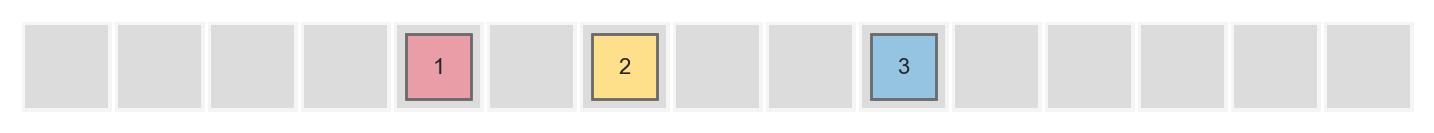

In [8]:
# GWorld Preview

Region = np.array(Scenario['Map']['Region'])
Walls = Scenario['Map']['Walls']
OneWays = Scenario['Map']['OneWays']

World = GWorld.GWorld(Region, Walls= Walls, OneWays = OneWays) # Initialising GWorld from Scenario

N_Agents = Scenario['N_Agents']
AgentLocations = Scenario['AgentLocations'].copy()
    
    
AgentLocations = []
for location in Scenario['AgentLocations']:
    AgentLocations.append(tuple(location))

# Adding N Agents at sorted random positions
if len(AgentLocations) < N_Agents:
    [locX,locY] = np.where(Region==1)

    LocIdxs = rng.choice(locX.shape[0], size=(N_Agents-len(AgentLocations)), replace=False, shuffle=False)
    LocIdxs.sort()

    for Idx in LocIdxs:
        AgentLocations.append((locX[Idx],locY[Idx]))

# Adding Agents
PreviousAgentAdded = True
for location in AgentLocations:
    # Adding new Agents if Previous Agent was Added to the World
    if PreviousAgentAdded: 
        Ag_i = Agent.Agent()
    PreviousAgentAdded = World.AddAgent(Ag_i,location, printStatus=False)

PreviousAgentAdded = True
while len(World.AgentList) < N_Agents:
    # Adding new Agents if Previous Agent was Added to the World
    if PreviousAgentAdded: 
        Ag_i = Agent.Agent()
    Loc_i = (np.random.randint(Region.shape[0]),np.random.randint(Region.shape[1]))
    PreviousAgentAdded = World.AddAgent(Ag_i,Loc_i, printStatus=False)


# Plotting the State of the World and Chosen Actions for the next iteration
plotgw.ViewGWorld(World,ViewActionArrows=False ,ViewActionTrail=False);

In [9]:
# Add Scenario to JSON file

GWorld.AddJsonScenario(json_filename=Scenario_destination_file,new_scenario=Scenario, new_scenario_name=new_scenario_name, Overwrite = Overwrite)
print(f'{new_scenario_name=}')

Overwriting Scenario:  SingleLane-3Agents-Aisle-Highway-Bidirectional
new_scenario_name='SingleLane-3Agents-Aisle-Highway-Bidirectional'
